In [2]:
import matplotlib.pyplot as plt
import os 
import sys 
import csv
import numpy as np
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [3]:
def parseDate2(date):
    if(date == None): return datetime.today()
    date_info = date.split("-")
    year, month, day = int(date_info[0].strip()), int(date_info[1].strip()), int(date_info[2].strip())
    return datetime(year, month, day)

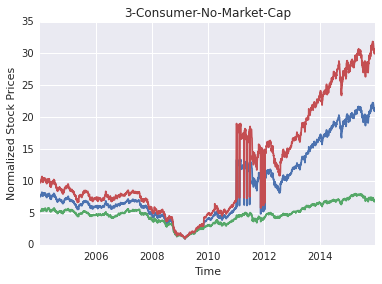

In [12]:


def plot_metagene(file_name, title):   
    with open(file_name, 'r') as f:
        reader = csv.reader(f, delimiter = ",")
        d = list(reader)
    darr = np.array(d)
    dates = darr[0][1:]
    weighted = darr[1][1:]
    weighted_5pc = darr[3][1:]
    weighted_50pc = darr[4][1:]
    weighted_95pc = darr[5][1:]
    date_points = [parseDate2(d) for d in dates]
    plt.plot(date_points, weighted)
    plt.plot(date_points, weighted_5pc)
    plt.plot(date_points, weighted_95pc)
    plt.xlabel("Time")
    plt.ylabel("Normalized Stock Prices")
    plt.title(title)

    
consumer_no_cap_file = "../data/metagene_output/no-market-cap/3-consumer-goods-no-cap-metagene.txt"
plot_metagene(consumer_no_cap_file, "3-Consumer-No-Market-Cap")

In [ ]:
healthcare_no_cap_file="../data/metagene_output/no-market-cap/5-healthcare-no-cap-metagene.txt"
plot_metagene(healthcare_no_cap_file)